<a href="https://colab.research.google.com/github/Gautam9596/Driver-Drowsiness-DL-Project/blob/main/Driver.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from zipfile import ZipFile
dataset = '/content/Driver.zip'
with ZipFile(dataset,'r') as zip:
  zip.extractall()
  print('Data is extracted')

Data is extracted


In [ ]:
import os
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import cv2
from google.colab.patches import cv2_imshow
from PIL import Image
from sklearn.model_selection import train_test_split

In [ ]:
closed_files = os.listdir('/content/train/Closed_Eyes')
open_files = os.listdir('/content/train/Open_Eyes')

In [ ]:
print(closed_files[0:4])

['s0016_00258_1_0_0_0_1_01.png', 's0016_01589_1_0_0_0_1_01.png', 's0016_00441_1_0_0_0_0_01.png', 's0001_00446_0_0_0_0_0_01.png']


In [ ]:
print(len(closed_files))

2000


In [ ]:
print(len(open_files))

2000


1 - Closed                                                            
                0 - Open

In [ ]:
closed_labels = [1]*2000
open_labels = [0]*2000

In [ ]:
labels = open_labels + closed_labels

In [ ]:
len(labels)

4000

In [ ]:
print(labels)

[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 

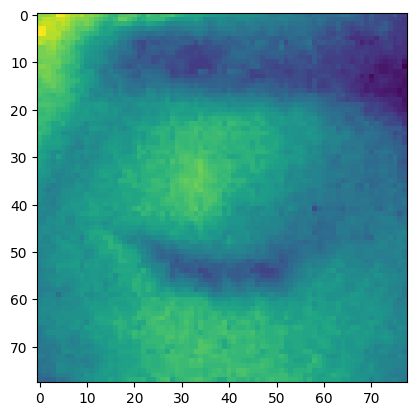

In [ ]:
img = mpimg.imread('/content/train/Closed_Eyes/s0001_00004_0_0_0_0_0_01.png')
imgplot = plt.imshow(img)

In [ ]:
#converting images to numpy array
open_path = '/content/train/Open_Eyes/'
data = []
for img_file in open_files:
  image = Image.open(open_path + img_file)
  image = image.resize((128,128))
  image = image.convert('RGB')
  image = np.array(image)
  data.append(image)




close_path = '/content/train/Closed_Eyes/'
for img_file in closed_files:
  image = Image.open(close_path + img_file)
  image = image.resize((128,128))
  image = image.convert('RGB')
  image = np.array(image)
  data.append(image)

In [ ]:
len(data)

4000

In [ ]:
type(data)

list

In [ ]:
data[0]

array([[[176, 176, 176],
        [176, 176, 176],
        [171, 171, 171],
        ...,
        [ 50,  50,  50],
        [ 48,  48,  48],
        [ 46,  46,  46]],

       [[175, 175, 175],
        [168, 168, 168],
        [152, 152, 152],
        ...,
        [ 48,  48,  48],
        [ 50,  50,  50],
        [ 47,  47,  47]],

       [[170, 170, 170],
        [161, 161, 161],
        [159, 159, 159],
        ...,
        [ 51,  51,  51],
        [ 54,  54,  54],
        [ 53,  53,  53]],

       ...,

       [[158, 158, 158],
        [155, 155, 155],
        [155, 155, 155],
        ...,
        [ 89,  89,  89],
        [ 92,  92,  92],
        [ 87,  87,  87]],

       [[157, 157, 157],
        [159, 159, 159],
        [160, 160, 160],
        ...,
        [ 98,  98,  98],
        [ 94,  94,  94],
        [ 88,  88,  88]],

       [[160, 160, 160],
        [158, 158, 158],
        [160, 160, 160],
        ...,
        [ 94,  94,  94],
        [ 90,  90,  90],
        [ 91,  91,  91]]

In [ ]:
print(data[0].shape)

(128, 128, 3)


In [ ]:
print(type(data[0]))

<class 'numpy.ndarray'>


In [ ]:
X = np.array(data)
Y = np.array(labels)

In [ ]:
X_train.shape

(3200, 128, 128)

In [ ]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=2)

In [ ]:
#scaling the data
X_train_scaled = X_train/255
X_test_scaled = X_test/255

In [ ]:
import tensorflow as tf
from tensorflow import keras

In [ ]:
model = keras.Sequential()
model.add(keras.layers.Conv2D(32, kernel_size=(3,3), activation='relu', input_shape=(128,128,3)))
model.add(keras.layers.MaxPooling2D(pool_size=(2,2)))   #Kernel Size = Filter Size

model.add(keras.layers.Conv2D(64, kernel_size=(3,3), activation='relu'))
model.add(keras.layers.MaxPooling2D(pool_size=(2,2)))

model.add(keras.layers.Flatten())

model.add(keras.layers.Dense(128, activation='relu'))
model.add(keras.layers.Dropout(0.5))  #Used to avoid OverFitting

model.add(keras.layers.Dense(64, activation='relu'))
model.add(keras.layers.Dropout(0.5))

model.add(keras.layers.Dense(2, activation='sigmoid'))

In [ ]:
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

In [ ]:
history = model.fit(X_train_scaled, Y_train, validation_split=0.1, epochs=5)

Epoch 1/5
90/90 [==============================] - 14s 22ms/step - loss: 0.4070 - accuracy: 0.7955 - val_loss: 0.1080 - val_accuracy: 0.9594
Epoch 2/5
90/90 [==============================] - 2s 17ms/step - loss: 0.1258 - accuracy: 0.9556 - val_loss: 0.0909 - val_accuracy: 0.9812
Epoch 3/5
90/90 [==============================] - 2s 17ms/step - loss: 0.0711 - accuracy: 0.9778 - val_loss: 0.0782 - val_accuracy: 0.9875
Epoch 4/5
90/90 [==============================] - 2s 17ms/step - loss: 0.0586 - accuracy: 0.9840 - val_loss: 0.0643 - val_accuracy: 0.9906
Epoch 5/5
90/90 [==============================] - 2s 17ms/step - loss: 0.0686 - accuracy: 0.9767 - val_loss: 0.0738 - val_accuracy: 0.9875


In [ ]:
model.evaluate(X_test_scaled, Y_test)

25/25 [==============================] - 0s 8ms/step - loss: 0.0241 - accuracy: 0.9937


[0.024108214303851128, 0.9937499761581421]